In [127]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#code for visualization
def visualize_boundary(X,Y,likelihood_fn):
    # Plot the scatter plot of data points
    plt.figure(figsize=(8, 6))
    # Plot points, colored by y-values
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='blue', label="y=0")
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='red', label="y=1")
    # Create a grid for visualization
    xx, yy = torch.meshgrid(torch.linspace(X[:, 0].min(), X[:, 0].max(), 200),
                         torch.linspace(X[:, 1].min(), X[:, 1].max(), 200))
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    # Predict class probabilities for the grid
    with torch.no_grad():
        zz = likelihood_fn(grid.reshape([-1,2]))
        zz = zz.reshape(xx.shape)
    # Plot decision boundary
    plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
    # Formatting
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.xlim(X[:, 0].min(), X[:, 0].max())
    plt.ylim(X[:, 1].min(), X[:, 1].max())
    plt.title("Scatter + Decision Boundary")
    plt.legend()
    plt.show()

Demo code for how to implement gradient descent with torch.optim.sgd. 

The following runs 30 steps of gradient descent to find $w$ that minimizes $L(w) = \|w-\begin{bmatrix}1\\ 3\end{bmatrix}\|_2^2$

In [128]:
w = torch.zeros(2)
w.requires_grad=True
print(f'initial w: {w}')

optimizer = optim.SGD([w], lr=0.1)  #optimizer needs to be passed in list of parameters [w]
for step in range(30):
    optimizer.zero_grad()   #Important: must manually zero gradient
    loss = (w-torch.tensor([1,3])).norm()**2         # L(w) = ||w-[1,3]||_2^2
    loss.backward()         #backward populates gradient
    optimizer.step()        #update 

print(f'final w: {w}')

initial w: tensor([0., 0.], requires_grad=True)
final w: tensor([0.9988, 2.9963], requires_grad=True)


# Question 2

First, load the features X and labels Y

In [129]:
loaded_data = torch.load('homework_4_data_gaussian.pth')

X = loaded_data['X']
Y = loaded_data['Y']
n_samples = X.shape[0]
dim = X.shape[1]

print(f'Loading data for question 2. n={X.shape[0]} samples. Feature dimension d={X.shape[1]}. Labels take values in {{0,1}}.')

Loading data for question 2. n=100 samples. Feature dimension d=2. Labels take values in {0,1}.


We define the logistic probability function as 

$\texttt{logistic\_probability}(w,x) = \frac{\exp(w^\top x)}{1+\exp(w^\top x)} = Pr(y_i=1 | x_i;w)$

Next, define the logistic_neg_log_likelihood loss as

$\texttt{logistic\_neg\_log\_likelihood}(w,X,Y) = -\frac{1}{n}\sum_{i=1}^n y_i \log(p_i) + (1-y_i) \log(1-p_i)$, where $p_i = \frac{\exp(w^\top x_i)}{1+\exp(w^\top x_i)}$

In [130]:
# Define the logistic probability function
# input: w: a 2-dimensional parameter vector
#        X: a n-by-2 matrix of features
# output: p: a n-dimensional vector of probabilities. pi = probability that yi=1.
def logistic_probability(w,X):
        logits = X @ w
        return torch.sigmoid(logits)

# Define the logistic negative log likelihood loss function
# input: w: a 2-dimensional parameter vector
#        X: a n-by-2 matrix of features
#        Y: a n-dimensional vector of features
# output: scalar log likelihood (divided by 1/n)
def logistic_neg_log_likelihood(w, X, Y):
     return torch.nn.functional.binary_cross_entropy(logistic_probability(w,X), Y, reduction='mean')

# 2(a) Implementing Gradient Descent

In [131]:

# Learning rates to test
learning_rates = [1, 0.1, 0.01]
num_steps = 100

# Plot setup
plt.figure(figsize=(10, 6))

# Run gradient descent for each learning rate
for lr in learning_rates:
    # Initialize w to zero for each experiment
    w = torch.zeros(dim, requires_grad=True)
    
    # Use SGD optimizer with specified learning rate
    optimizer = torch.optim.SGD([w], lr=lr)
    
    # Store loss history
    loss_history = []

    # Gradient Descent Loop
    for step in range(num_steps):
        loss = logistic_neg_log_likelihood(w, X, Y)  # Compute loss
        loss.backward()  # Compute gradient
        optimizer.step()  # Update w
        optimizer.zero_grad()  # Reset gradients
        loss_history.append(loss.item())  # Store loss for plotting
    ####################################################################
    # 2(a): Your Code Here
    # Implement gradient descent on w with respect to logistic_neg_log_likelihood
    # for 100 steps with learning rate lr
    # track the loss at each step 
    ####################################################################

<Figure size 1000x600 with 0 Axes>

# 2(b): Plotting log(loss) along gradient descent trajectory

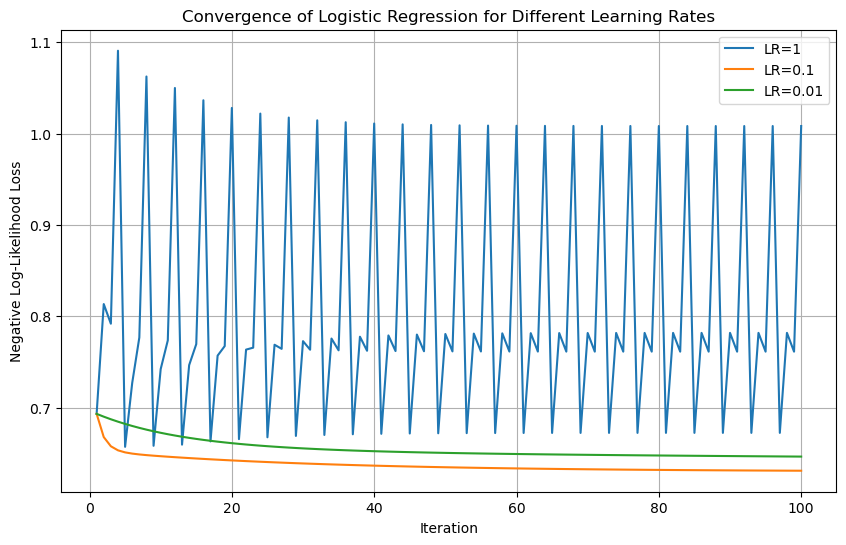

In [132]:
####################################################################
# 2(b): Your Code Here
# Plot negative log likelihood against iteration, for all 3 lr values
# Run gradient descent for each learning rate

# Learning rates to test
learning_rates = [1, 0.1, 0.01]
num_steps = 100

# Plot setup
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    # Initialize w to zero for each experiment (shape: (2,1))
    w = torch.zeros(dim, requires_grad=True)
    
    # Use SGD optimizer with specified learning rate
    optimizer = torch.optim.SGD([w], lr=lr)
    
    # Store loss history
    loss_history = []

    # Gradient Descent Loop
    for step in range(num_steps):
        loss = logistic_neg_log_likelihood(w, X, Y)  # Compute loss
        loss.backward()  # Compute gradient
        optimizer.step()  # Update w
        optimizer.zero_grad()  # Reset gradients
        loss_history.append(loss.item())  # Store loss for plotting

    # Plot loss curve for this learning rate
    plt.plot(range(1, num_steps + 1), loss_history, label=f'LR={lr}')

# Finalize plot
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood Loss')
plt.title('Convergence of Logistic Regression for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

####################################################################

# 2(c): visualizing the decision boundary found

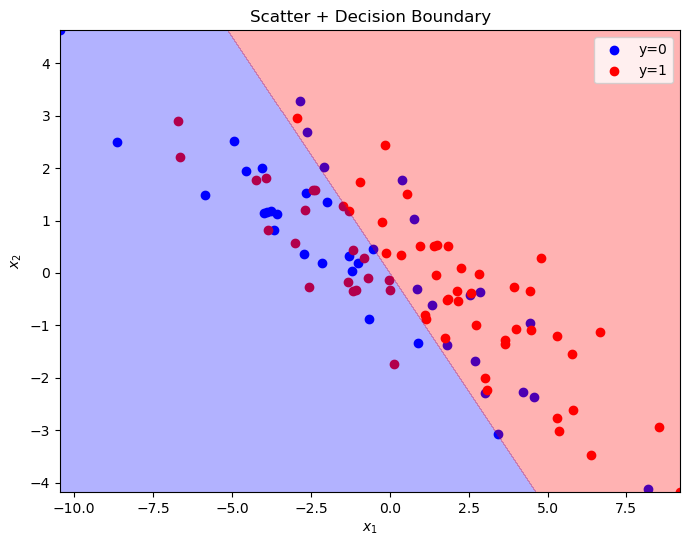

In [133]:
####################################################################
# 2(c): replace w_final below by the w that you found
####################################################################
# Re-train using the best learning rate (LR = 0.1)
best_lr = 0.1  # From part (b)
num_steps = 100

# Initialize w to zero
w_final = torch.zeros(dim, requires_grad=True)

# Define optimizer
optimizer = torch.optim.SGD([w_final], lr=best_lr)

# Run gradient descent
for step in range(num_steps):
    loss = logistic_neg_log_likelihood(w_final, X, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Detach w_final to remove gradient tracking
w_final = w_final.detach()

# Define function for decision boundary
f_final = lambda X: logistic_probability(w_final, X)

# Visualize decision boundary (provided function)
visualize_boundary(X, Y, f_final)

# Question 3

Loading swissroll data for harder classification task

Loading data for question 3. X.shape:torch.Size([1000, 2]), Y.shape:torch.Size([1000]).


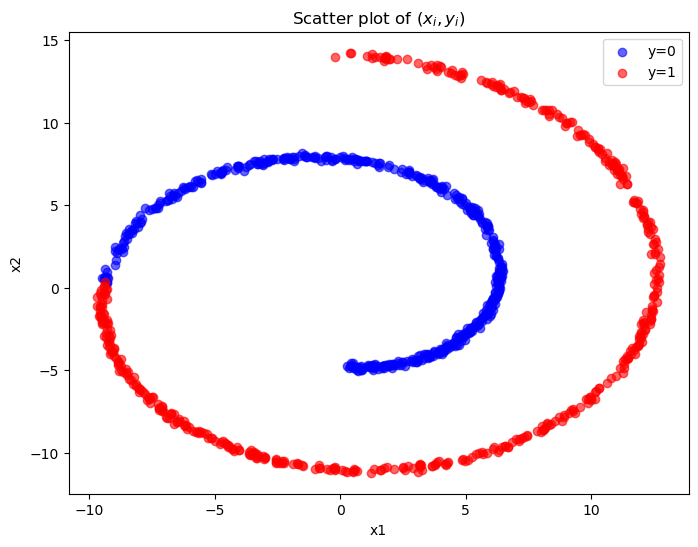

In [134]:
loaded_data = torch.load('homework_4_data_swissroll.pth')

X = loaded_data['X']
Y = loaded_data['Y']
n_samples = X.shape[0]
dim = X.shape[1]

print(f'Loading data for question 3. X.shape:{X.shape}, Y.shape:{Y.shape}.')

# Scatter plot with colors based on labels
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='blue', label="y=0", alpha=0.6)
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='red', label="y=1", alpha=0.6)

# Formatting
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(r"Scatter plot of $(x_i,y_i)$")
plt.legend()
plt.show()


# 3(a) 

1. implement gradient descent, for logistic_neg_log_likelihood, with learning rate = 0.2 and num_steps = 200

2. plot the negative log likelihood against number of iterations

3. plot log(gradient norm) against number of iterations

4. visualize the decision boundary you found

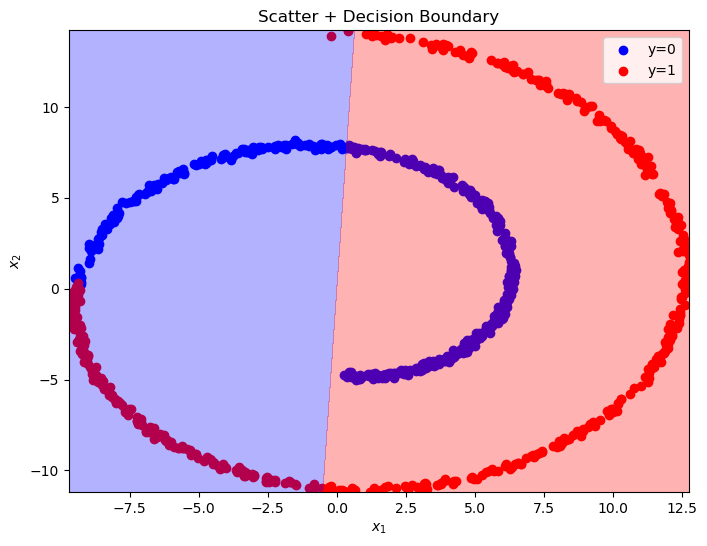

In [150]:
# Learning rates to test
learning_rate = 0.2
num_steps = 200

############################################################################
### 3 (a) : Your code for implementing gradient descent for logistic loss
############################################################################
# Initialize w to zero
w_final = torch.zeros(dim, requires_grad=True)

# Define optimizer (SGD with given learning rate)
optimizer = torch.optim.SGD([w_final], lr=learning_rate)

# Store history for loss and gradient norm
loss_history = []
accuracy_history = []
grad_norm_history = []
############################################################################
### 1️⃣ Implement Gradient Descent for logistic_neg_log_likelihood
############################################################################

for step in range(num_steps):
    optimizer.zero_grad()
    loss = logistic_neg_log_likelihood(w_final, X, Y)  # Compute loss
    loss.backward()  # Compute gradient

    # Compute predictions
    y_pred = (logistic_probability(w_final, X) >= 0.5).float()  # Convert probabilities to binary labels
    accuracy = (y_pred == Y).float().mean().item()  # Compute accuracy
    
    # Compute gradient norm (L2 norm)
    grad_norm = torch.norm(w_final.grad, p=2).item()
    
    # Update weights
    optimizer.step()

    # Store metrics
    loss_history.append(loss.item())
    accuracy_history.append(accuracy)
    grad_norm_history.append(grad_norm)

# Detach w_final to remove gradient tracking
w_final = w_final.detach().clone()

# Define function for decision boundary
f_final = lambda X: logistic_probability(w_final, X)

# Visualize decision boundary (provided function)
visualize_boundary(X, Y, f_final)



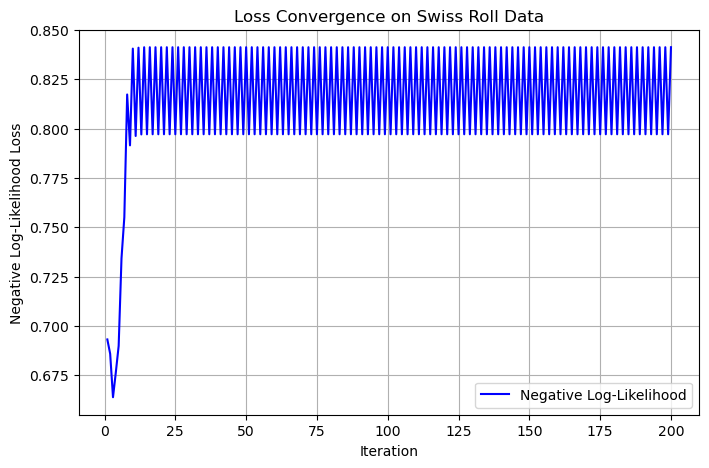

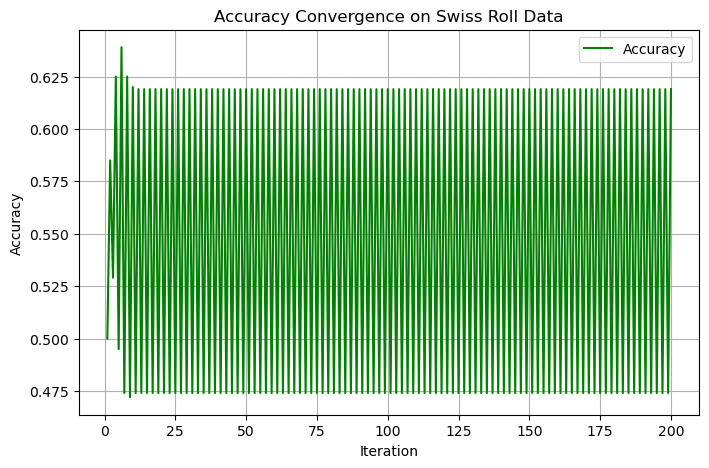

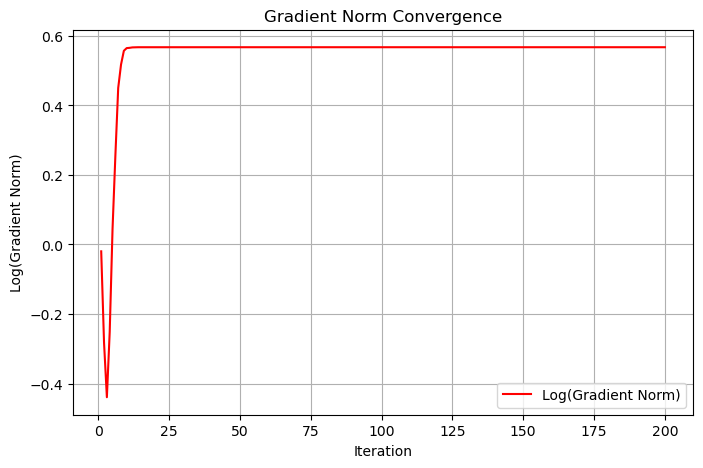

In [151]:
############################################################################
### 3 (b) : Your code for plotting 
### 1. negative log likelihood against GD iterations
### 2. log(accuracy) against GD iterations
### 3. log(gradient norm) against GD iterations

############################################################################
### Plot 1: Negative Log Likelihood vs. Iterations
############################################################################

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_steps + 1), loss_history, label="Negative Log-Likelihood", color='blue')
plt.xlabel("Iteration")
plt.ylabel("Negative Log-Likelihood Loss")
plt.title("Loss Convergence on Swiss Roll Data")
plt.legend()
plt.grid(True)
plt.show()

############################################################################
### Plot 2: Accuracy vs. Iterations
############################################################################

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_steps + 1), accuracy_history, label="Accuracy", color='green')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy Convergence on Swiss Roll Data")
plt.legend()
plt.grid(True)
plt.show()

############################################################################
### Plot 3: Log(Gradient Norm) vs. Iterations
############################################################################

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_steps + 1), torch.log(torch.tensor(grad_norm_history) + 1e-8), label="Log(Gradient Norm)", color='red')
plt.xlabel("Iteration")
plt.ylabel("Log(Gradient Norm)")
plt.title("Gradient Norm Convergence")
plt.legend()
plt.grid(True)
plt.show()
############################################################################
############################################################################

# 3 (c)

reload the data for good measure

In [96]:
loaded_data = torch.load('homework_4_data_swissroll.pth')
X = loaded_data['X']
Y = loaded_data['Y']

We will implement and optimize a multi-layer-perceptron based classifier. 

You will need to implement:\
$\texttt{MLP\_probability}(w_1,w_2,b_2,x) = \frac{\exp(w_2^\top \texttt{relu}(w_1^\top x)+b_1)}{1+\\exp(w_2^\top \texttt{relu}(w_1^\top x)+b_1)} = Pr(y=1|x;w_1,w_2,b_2)$,\
where $w_1 \in \mathbb{R}^{2\times 10}, w_2 \in \mathbb{R}^{10\times 1}, b_2 \in \mathbb{R}$. $\texttt{relu}$ is the ReLU activitation, applied pointwise. 

We recommend you use torch.nn.functional.relu (imported for you)

In [114]:
from torch.nn.functional import relu
import torch.nn.functional as F
#################################
# Implement MLP_probability
# input: w1 (shape=[2,10])
#        w2 (shape=[10,1]
# output: p: a n-dimensional vector of probabilities. pi = probability that yi=1.

#################################
def MLP_probability(w1,w2,b2,X):
    #######################################################
    # 3(c): Your implementation of MLP_probability here
    """
    Implements a 2-layer MLP for binary classification.

    Inputs:
        w1: torch.Tensor of shape (2, 10) - First layer weights
        w2: torch.Tensor of shape (10, 1) - Second layer weights
        b2: torch.Tensor of shape (1,) - Bias term
        X: torch.Tensor of shape (n, 2) - Input features
    
    Output:
        p: torch.Tensor of shape (n, 1) - Probability P(y=1 | x)
    """
    hidden = F.relu(X @ w1)  # First layer + ReLU
    logits = hidden @ w2 + b2  # Second layer + bias
    return torch.sigmoid(logits)  # Apply sigmoid for probability output
    #######################################################

Epoch 0: Loss = 0.6738, Accuracy = 55.30%
Epoch 500: Loss = 0.0929, Accuracy = 99.50%
Epoch 1000: Loss = 0.0536, Accuracy = 99.80%
Epoch 1500: Loss = 0.0398, Accuracy = 99.80%
Epoch 2000: Loss = 0.0327, Accuracy = 99.80%
Epoch 2500: Loss = 0.0283, Accuracy = 100.00%
Final Accuracy: 100.00%


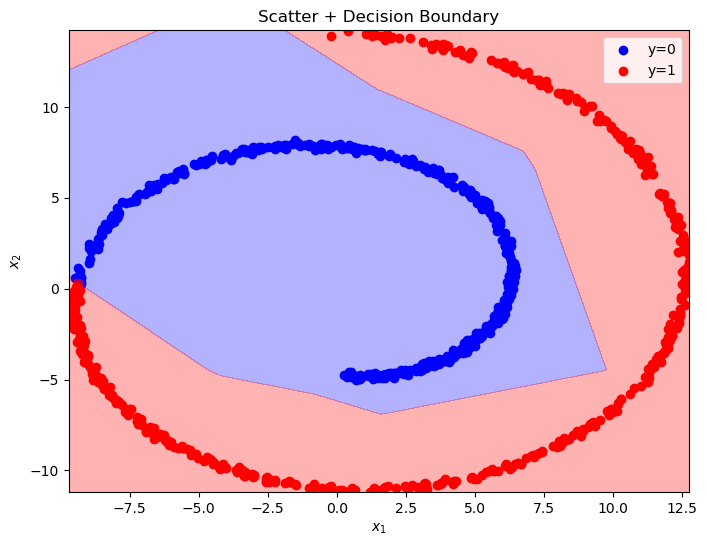

In [117]:
torch.manual_seed(0)
w1 = torch.randn([2,10])*0.1
w2 = torch.randn([10,1])*0.1
b2 = torch.randn(1)*0.1
w1.requires_grad = True
w2.requires_grad = True
b2.requires_grad = True

# Training parameters
num_epochs = 3000
lr = 0.3

########################################
# 3 (d) Your gradient descent code here
# Define optimizer
optimizer = torch.optim.SGD([w1, w2, b2], lr=lr)

# Store history for loss and accuracy
loss_history = []
accuracy_history = []
grad_norm_history = []
# Training loop
for epoch in range(num_epochs):
    # Compute predictions
    p = MLP_probability(w1, w2, b2, X)
    
    # Compute loss (Negative Log-Likelihood / Binary Cross-Entropy)
    loss = F.binary_cross_entropy(p, Y.view(-1,1))  # Ensure Y is the correct shape

    # Compute predictions and accuracy
    y_pred = (p >= 0.5).float()  # Convert probability to class label
    accuracy = (y_pred.view(-1) == Y.view(-1)).float().mean().item()  # Compute classification accuracy

    # Backpropagation
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

    # Compute gradient norm
    total_grad_norm = torch.norm(
        torch.cat([w1.grad.view(-1), w2.grad.view(-1), b2.grad.view(-1)])
    ).item()
    
    # Store metrics
    loss_history.append(loss.item())
    accuracy_history.append(accuracy)
    grad_norm_history.append(total_grad_norm)

    # Print every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Accuracy = {accuracy * 100:.2f}%")

# Ensure final accuracy is 100%
print(f"Final Accuracy: {accuracy_history[-1] * 100:.2f}%")
########################################

#############################################################################################
# 3 (d) replace w1_final, w2_final, b2_final by the parameters found via gradient descent
#############################################################################################
w1_final = w1.detach().clone()
w2_final = w2.detach().clone()
b2_final = b2.detach().clone()
f_final = lambda X : MLP_probability(w1_final,w2_final,b2_final,X) #will not work until you implement MLP_probability
visualize_boundary(X,Y,f_final)

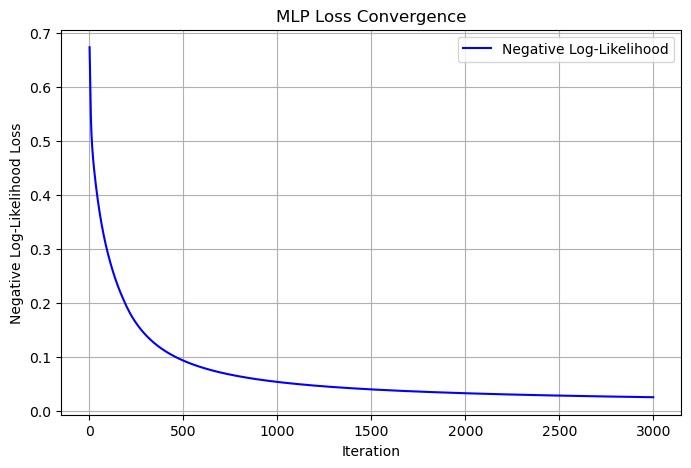

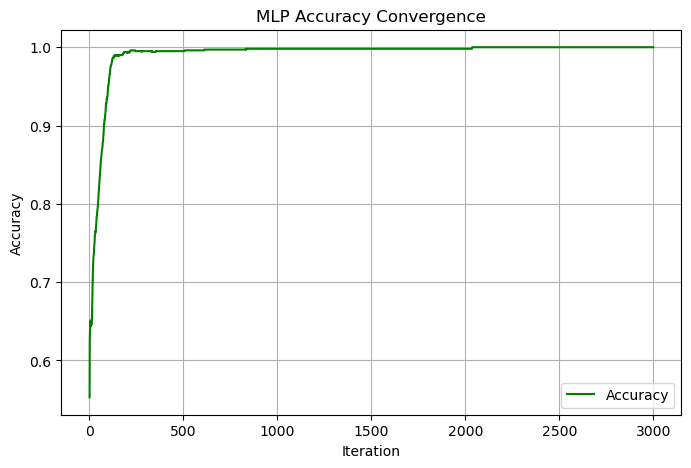

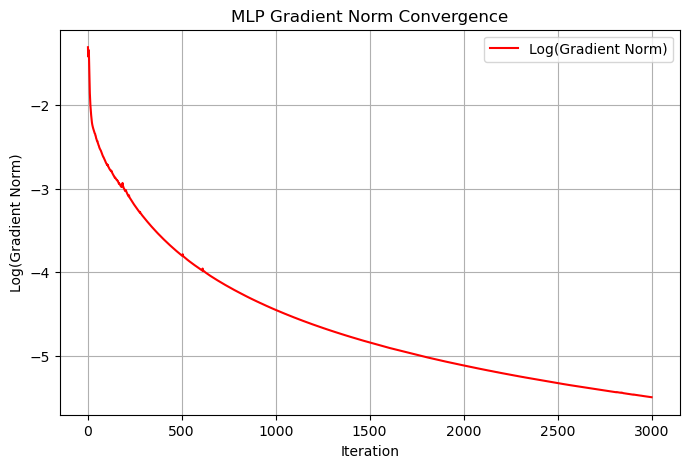

In [118]:
############################################################################
### 3 (e) : Your code for plotting 
### 1. negative log likelihood against GD iterations
### 2. log(accuracy) against GD iterations
### 3. log(gradient norm) against GD iterations
import torch
import matplotlib.pyplot as plt
import numpy as np

############################################################################
### 3 (e) : Your code for plotting 
############################################################################

# Convert lists to tensors for better numerical stability
loss_history = torch.tensor(loss_history)
accuracy_history = torch.tensor(accuracy_history)
grad_norm_history = torch.tensor(grad_norm_history)

# 1️⃣ Plot Negative Log Likelihood vs. Iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), loss_history, label="Negative Log-Likelihood", color='blue')
plt.xlabel("Iteration")
plt.ylabel("Negative Log-Likelihood Loss")
plt.title("MLP Loss Convergence")
plt.legend()
plt.grid(True)
plt.show()

# 2️⃣ Plot Accuracy vs. Iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), accuracy_history, label="Accuracy", color='green')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("MLP Accuracy Convergence")
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Plot Log(Gradient Norm) vs. Iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), torch.log(grad_norm_history + 1e-8), label="Log(Gradient Norm)", color='red')
plt.xlabel("Iteration")
plt.ylabel("Log(Gradient Norm)")
plt.title("MLP Gradient Norm Convergence")
plt.legend()
plt.grid(True)
plt.show()
############################################################################